# Stream 04

### Sklearn

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
df_iris = pd.read_csv('iris.csv')

In [60]:
df_iris = df_iris.iloc[:100]
df_iris = df_iris.sample(frac=1).reset_index(drop=True)
df_iris['species'] = df_iris['species'].astype('category').cat.codes

In [61]:
X_train = df_iris[['sepal_length', 'sepal_width']][:67].values
Y_train = df_iris['species'][:67]

X_test = df_iris[['sepal_length', 'sepal_width']][67:].values
Y_test = df_iris['species'][67:]

print("X_train.shape: {}".format(X_train.shape))
print("Y_train.shape: {}".format(Y_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("Y_test.shape: {}".format(Y_test.shape))

X_train.shape: (67, 2)
Y_train.shape: (67,)
X_test.shape: (33, 2)
Y_test.shape: (33,)


In [62]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=2000)
mlp.fit(X_train, Y_train)
mlp.score(X_test, Y_test)

1.0

In [63]:
h = 0.01
x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

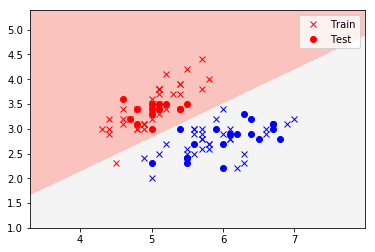

In [64]:
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.plot(X_train[Y_train == 0][:, 0], X_train[Y_train == 0][:, 1], 'rx', label='Train')
plt.plot(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], 'bx')
plt.plot(X_test[Y_test == 0][:, 0], X_test[Y_test == 0][:, 1], 'ro', label='Test')
plt.plot(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], 'bo')
plt.legend()
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

### Keras

In [65]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # the two types of neural network layer we will be using
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

In [66]:
batch_size = 128 # in each iteration, we consider 128 training examples at once
num_epochs = 20 # we iterate twenty times over the entire training set
hidden_size = 512 # there will be 512 neurons in both hidden layers

In [67]:
num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

In [68]:
height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

In [70]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

In [76]:
X_train.shape

(60000, 28, 28)

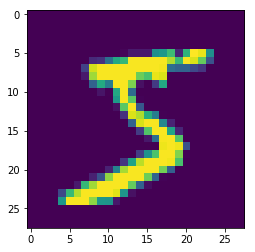

In [74]:
plt.imshow(X_train[0])

In [80]:
X_train = X_train.reshape(num_train, height * width) # Flatten data to 1D
X_test = X_test.reshape(num_test, height * width) # Flatten data to 1D
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

In [81]:
Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

In [82]:
inp = Input(shape=(height * width,)) # Our input is a 1D vector of size 784
hidden_1 = Dense(hidden_size, activation='relu')(inp) # First hidden ReLU layer
hidden_2 = Dense(hidden_size, activation='relu')(hidden_1) # Second hidden ReLU layer
out = Dense(num_classes, activation='softmax')(hidden_2) # Output softmax layer

In [83]:
model = Model(input=inp, output=out) # To define a model, just specify its input and output layers

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [84]:
model.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

In [ ]:
model.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, nb_epoch=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 6s 105us/step - loss: 0.8377 - acc: 0.7546 - val_loss: 0.3354 - val_acc: 0.9077
Epoch 2/20
54000/54000 [==============================] - 6s 105us/step - loss: 0.3636 - acc: 0.8937 - val_loss: 0.2688 - val_acc: 0.9237
Epoch 3/20
54000/54000 [==============================] - 6s 104us/step - loss: 0.3070 - acc: 0.9099 - val_loss: 0.2302 - val_acc: 0.9307
Epoch 4/20
54000/54000 [==============================] - 6s 111us/step - loss: 0.2631 - acc: 0.9227 - val_loss: 0.1946 - val_acc: 0.9420
Epoch 5/20
54000/54000 [==============================] - 6s 108us/step - loss: 0.2280 - acc: 0.9332 - val_loss: 0.1790 - val_acc: 0.9460
Epoch 6/20
54000/54000 [==============================] - 6s 112us/step - loss: 0.1985 - acc: 0.9416 - val_loss: 0.1569 - val_acc: 0.9535
Epoch 7/20
54000/54000 [==============================] - 6s 114us/step - loss: 0.1723 - acc: 0.9488 - val_loss: 0.1353 - v

In [ ]:
model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!